In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
%cd "/data/groups/ag_kircher/"

/fast/home/groups/ag_kircher


# Load features

In [4]:
features_IH01 = pd.read_csv("cfDNA-reanalysis_Graz/kristin/rf_model/IH01/features.csv", sep = "\t", index_col = 0, header = 0)
features_IC17 = pd.read_csv("cfDNA-reanalysis_Graz/kristin/rf_model/IC17/features.csv", sep = "\t", index_col = 0, header = 0) 

# Split into trainings and test set 

In [5]:
##training and test data 

from sklearn.model_selection import train_test_split

train, test= train_test_split(features_IH01, test_size = 0.25, random_state = 42)

display(train.shape)
display(test.shape)


(8457, 39)

(2819, 39)

# Linear Regression  

In [6]:
reg = LinearRegression().fit(train.drop("monocytes", axis = 1), train.loc[:,"monocytes"])

In [7]:
reg.score(train.drop("monocytes", axis = 1), train.loc[:,"monocytes"])

0.15083941812378432

In [47]:
importance = reg.coef_
imp_features = pd.DataFrame(columns = ['feature', 'importance'])


for i,v in enumerate(importance):
    imp_features.loc[i,:] = [train.columns[i],abs(v)]

imp_features.sort_values(by = 'importance', ascending = False)

,feature,importance
23,mean_cov_2k,23.613545
19,mean_cov_upstream1kb,11.602158
16,mean_cov_body1kb,11.527221
32,mean_wps_2k,3.674799
25,mean_wps_body1kb,2.026927
28,mean_wps_upstream1kb,1.995019
26,median_wps_body1kb,0.027762
34,max_wps_2k,0.019135
24,median_cov_2k,0.011458
36,max_cov_2k,0.011296


In [9]:
linear_reg_train = pd.DataFrame(columns = ["monocytes", "predicted"])
linear_reg_train["monocytes"] = train["monocytes"]
linear_reg_train["predicted"] = reg.predict(train.drop("monocytes", axis = 1))

In [10]:
linear_reg_test = pd.DataFrame(columns = ["monocytes", "predicted"])
linear_reg_test["monocytes"] = test["monocytes"]
linear_reg_test["predicted"] = reg.predict(test.drop("monocytes", axis = 1))

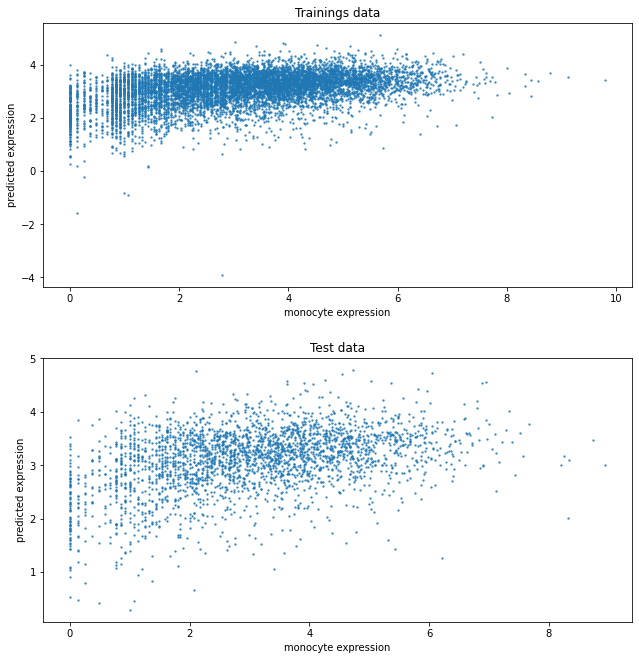

In [26]:
fig, axs = plt.subplots(2, figsize = (10,10))
fig.tight_layout(pad=5.0)
axs[0].set_xlabel("monocyte expression")
axs[0].set_ylabel("predicted expression")
axs[1].set_xlabel("monocyte expression")
axs[1].set_ylabel("predicted expression")
axs[0].set_title("Trainings data")
axs[1].set_title("Test data")
axs[0].scatter(linear_reg_train.loc[:,'monocytes'], linear_reg_train.loc[:,'predicted'], s = 2, alpha = 0.7)
axs[1].scatter(linear_reg_test.loc[:,'monocytes'], linear_reg_test.loc[:,'predicted'], s = 2, alpha = 0.7)

In [12]:
##print correlation
print("IH01 training set: \n", linear_reg_train[['monocytes', 'predicted']].corr())
print("IH01 test set: \n", linear_reg_test[['monocytes', 'predicted']].corr())

IH01 training set: 
            monocytes  predicted
monocytes   1.000000   0.388381
predicted   0.388381   1.000000
IH01 test set: 
            monocytes  predicted
monocytes   1.000000   0.383684
predicted   0.383684   1.000000


# Support Vector Regression

In [13]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel = 'rbf'))

In [21]:
regr.fit(train.drop("monocytes", axis = 1), train.loc[:,"monocytes"])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [22]:
svm_reg_train = pd.DataFrame(columns = ["monocytes", "predicted"])
svm_reg_train["monocytes"] = train["monocytes"]
svm_reg_train["predicted"] = regr.predict(train.drop("monocytes", axis = 1))

In [23]:
svm_reg_test = pd.DataFrame(columns = ["monocytes", "predicted"])
svm_reg_test["monocytes"] = test["monocytes"]
svm_reg_test["predicted"] = regr.predict(test.drop("monocytes", axis = 1))

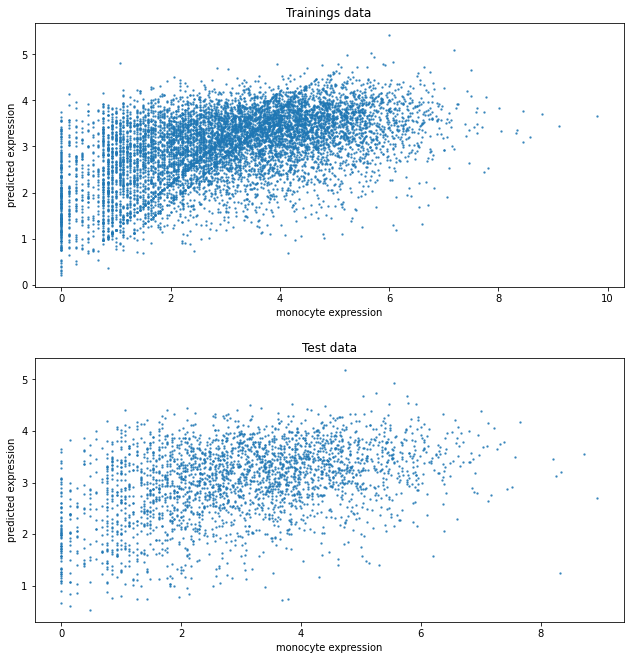

In [29]:
fig, axs = plt.subplots(2, figsize = (10,10))
fig.tight_layout(pad=5.0)
axs[0].set_xlabel("monocyte expression")
axs[0].set_ylabel("predicted expression")
axs[1].set_xlabel("monocyte expression")
axs[1].set_ylabel("predicted expression")
axs[0].set_title("Trainings data")
axs[1].set_title("Test data")
axs[0].scatter(svm_reg_train.loc[:,'monocytes'], svm_reg_train.loc[:,'predicted'], s = 2, alpha = 0.7)
axs[1].scatter(svm_reg_test.loc[:,'monocytes'], svm_reg_test.loc[:,'predicted'], s = 2, alpha = 0.7)

In [25]:
##print correlation
print("IH01 training set: \n", svm_reg_train[['monocytes', 'predicted']].corr())
print("IH01 test set: \n", svm_reg_test[['monocytes', 'predicted']].corr())

IH01 training set: 
            monocytes  predicted
monocytes   1.000000   0.490103
predicted   0.490103   1.000000
IH01 test set: 
            monocytes  predicted
monocytes   1.000000   0.383168
predicted   0.383168   1.000000
